In [2]:
import pandas as pd
import numpy as np
import sys
import multiprocessing
import time
import os

import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
from pandas.tseries.offsets import BDay
import pickle as pkl
import fnmatch
import pickle
import datetime as dt
from datetime import timedelta
import glob
import fathon
from fathon import fathonUtils as fu
import itertools
import matplotlib as mpl
from scipy.stats import jarque_bera
from multiprocessing import Pool, freeze_support, Manager
import itertools
colormap = plt.cm.RdBu
from scipy.cluster import hierarchy as hc
plt.style.use(os.path.join(mpl.get_configdir(),'latexstyle3.mplstyle'))

import freqopttest.kernel as kernel

In [3]:
t7 = '/media/ak/T71/August11th2022Experiments'
folders = os.listdir(t7)
returns = os.path.join(t7, 'Returns')
expOne = os.path.join(t7, 'ExperimentOne')
expTwo = os.path.join(t7, 'ExperimentTwo')
mfdfa_dfs = os.path.join(t7, 'mfdfaDataFrames')
ExperimentInputFiles = os.path.join(t7, 'ExperimentInputFiles')
QuadMMDOutputFilesLoc = os.path.join(expOne, 'QuadMMDOutputFiles')
LinearMMDOutputFilesLoc = os.path.join(expOne, 'LinearMMDOutputFiles')
# rx1 = os.path.join(ExperimentInputFiles, 'RX1')
figures = '/home/ak/Documents/Papers/StylisedFactsPaper/figures'

In [15]:
LinearMMDOutputFiles = os.listdir(LinearMMDOutputFilesLoc)
# 
# 


In [18]:
QuadMMDOutputFiles = [f for f in LinearMMDOutputFiles if str('quad') in f]
symbol = 'JB1'
SymbolQuadMMDOutputFiles  = [f for f in LinearMMDOutputFiles if str(symbol) in f] 
variable_choice = 'tau'
tauFiles = [f for f in [f for f in SymbolQuadMMDOutputFiles  if str(variable_choice) in f ] if str('_quad_') in f]


In [33]:
tauFileIdx = 0
tauFileLoc = os.path.join(LinearMMDOutputFilesLoc, tauFiles[tauFileIdx])

print(tauFileLoc)

file_dict = pd.read_pickle(tauFileLoc)

shifts = list(tauFileDict.keys())
numIdx = 0 
resultsFile = tauFileDict[numIdx]

/media/ak/T71/August11th2022Experiments/ExperimentOne/LinearMMDOutputFiles/JB1_tau_shift_2_wind_5_quad_MMD_test.pkl


{'alpha': 0.05,
 'pvalue': 0.0125,
 'test_stat': 0.036739116319637555,
 'h0_rejected': True,
 'list_permuted_mmd2': array([ 0.00735139, -0.00916136, -0.00637223, ..., -0.0038945 ,
         0.00146659, -0.00824786])}

In [45]:
perm_mmds1_dict = {idxShift:file_dict[shifts[idxShift]]['perm_mmds1'] for idxShift in range(0, len(shifts)) }
chi2_weights_dict = {idxShift:file_dict[shifts[idxShift]]['chi2_weights'] for idxShift in range(0, len(shifts)) }
sim_mmds_dict = {idxShift:file_dict[shifts[idxShift]]['sim_mmds'] for idxShift in range(0, len(shifts)) }
list_gwidth_dict = {idxShift:file_dict[shifts[idxShift]]['list_gwidth'] for idxShift in range(0, len(shifts)) }
powers_dict = {idxShift:file_dict[shifts[idxShift]]['powers'] for idxShift in range(0, len(shifts)) }




In [32]:
perm_mmds1_dict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [37]:
pd.DataFrame.from_dict(sim_mmds)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.004301,0.003853,0.003808,0.003534,0.003470,0.003469,0.003908,0.003943,0.003298,0.003241,...,0.003102,0.003242,0.004096,0.003457,0.003180,0.003338,0.004178,0.003478,0.003698,0.003646
1,-0.003826,-0.003982,-0.003836,-0.003888,-0.003505,-0.003772,-0.002588,-0.002572,-0.003595,-0.003660,...,-0.004006,-0.003797,-0.003689,-0.003573,-0.003893,-0.003719,-0.003753,-0.003858,-0.002594,-0.002581
2,-0.002372,-0.001435,-0.001417,-0.001217,-0.001207,-0.001147,-0.001569,-0.001592,-0.001125,-0.001139,...,-0.000731,-0.000842,-0.002063,-0.001156,-0.000733,-0.000876,-0.002089,-0.001211,-0.000398,-0.000877
3,-0.004108,-0.004009,-0.003955,-0.003824,-0.003620,-0.003648,-0.003595,-0.003581,-0.003521,-0.003611,...,-0.004527,-0.004535,-0.004272,-0.003599,-0.004452,-0.004502,-0.004348,-0.003795,-0.003564,-0.003616
4,0.004789,0.004262,0.004144,0.004112,0.003867,0.004022,0.002891,0.002908,0.003949,0.004019,...,0.003927,0.003813,0.004247,0.003924,0.003810,0.003710,0.004345,0.004087,0.002038,0.002185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.000220,-0.000084,-0.000193,-0.000166,-0.000432,-0.000306,0.001397,0.001348,-0.000464,-0.000414,...,0.000074,0.000012,0.000608,-0.000445,0.000073,0.000036,0.000544,-0.000171,0.001870,0.002241
1996,0.004135,0.003850,0.003707,0.003520,0.003230,0.003344,0.002728,0.002750,0.003099,0.003136,...,0.002431,0.002433,0.004054,0.003223,0.002344,0.002394,0.004129,0.003476,0.002386,0.002385
1997,0.013047,0.012569,0.012311,0.012008,0.011268,0.011588,0.010566,0.010564,0.011119,0.011278,...,0.012643,0.012514,0.012611,0.011288,0.012443,0.012444,0.012825,0.011896,0.009862,0.010119
1998,0.001448,0.001777,0.001638,0.001915,0.001575,0.001777,0.002184,0.002130,0.001793,0.001909,...,0.003190,0.002948,0.001833,0.001659,0.003074,0.002792,0.001832,0.001910,0.002578,0.002792


In [40]:
perm_mmds = pd.DataFrame.from_dict(perm_mmds1_dict)

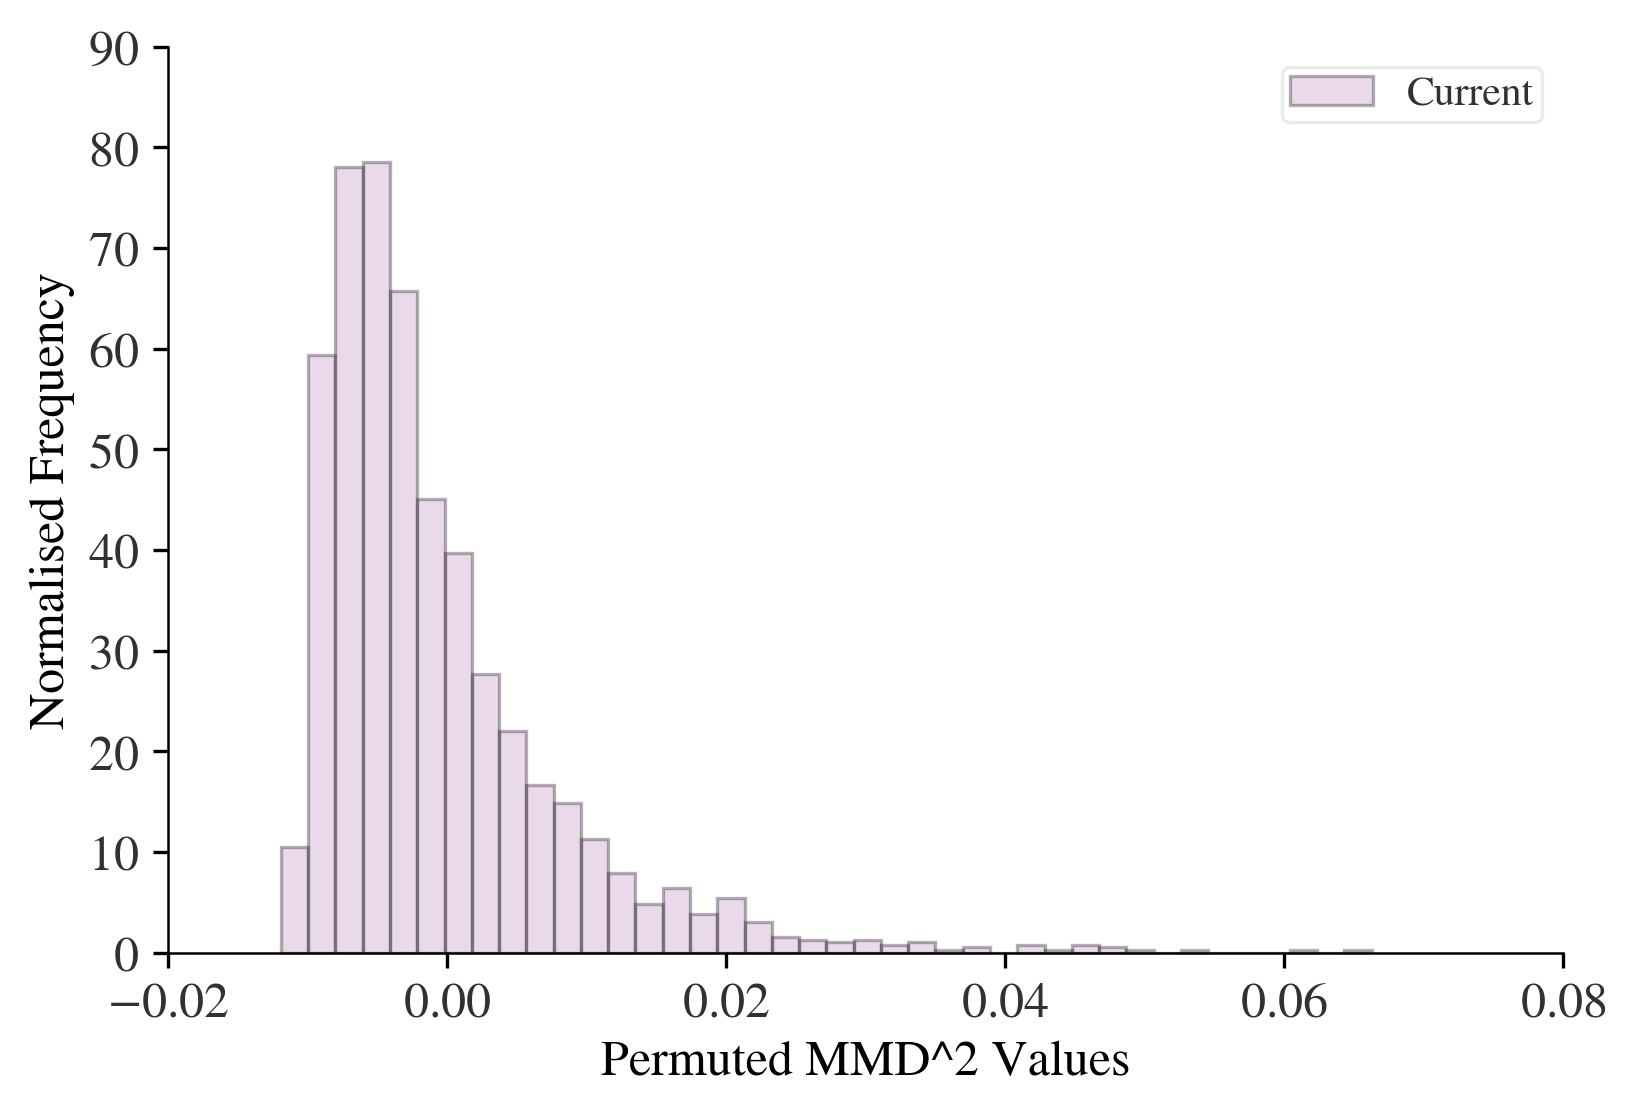

In [50]:
_=plt.hist(perm_mmds.median(axis=1), density= True, alpha =0.3, label ='Current', bins =40)
plt.xlabel('Permuted MMD^2 Values')
plt.ylabel('Normalised Frequency')


plt.legend()